Customer Churn Analysis for Telecom Industry

In [3]:
import pandas as pd

file_path = "/content/sample_data/Telecom_cust.csv"
# Use the file_path variable which contains the correct string path
df = pd.read_csv(file_path)
df.head()

,customer_id,call_duration_last_month,num_complaints,recharge_frequency,avg_recharge_amount,internet_usage_gb,days_since_last_login,churned
0,CUST0001,349.671415,2,6,10.000000,18.861890,58,0
1,CUST0002,286.173570,0,1,91.952108,8.008133,45,1
2,CUST0003,364.768854,0,8,84.462632,11.250952,22,1
3,CUST0004,452.302986,1,9,126.784761,14.028676,31,0
4,CUST0005,276.584662,0,9,83.102242,0.000000,16,1


In [4]:
# Shape and column types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               150 non-null    object 
 1   call_duration_last_month  150 non-null    float64
 2   num_complaints            150 non-null    int64  
 3   recharge_frequency        150 non-null    int64  
 4   avg_recharge_amount       150 non-null    float64
 5   internet_usage_gb         150 non-null    float64
 6   days_since_last_login     150 non-null    int64  
 7   churned                   150 non-null    int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 9.5+ KB


In [5]:
# Summary statistics
df.describe()

,call_duration_last_month,num_complaints,recharge_frequency,avg_recharge_amount,internet_usage_gb,days_since_last_login,churned
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,291.767313,0.526667,4.413333,105.399468,10.286721,32.600000,0.253333
std,94.234222,0.701835,2.974583,33.391195,5.432009,16.564699,0.436377
min,38.025490,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000
25%,233.102856,0.000000,2.000000,86.471332,6.659358,20.000000,0.000000
50%,294.608192,0.000000,4.000000,107.107254,10.365723,35.000000,0.000000
75%,349.093372,1.000000,7.000000,123.451220,14.283028,45.000000,0.750000
max,546.324211,3.000000,9.000000,178.500998,25.872211,59.000000,1.000000


In [6]:
# Check for nulls
df.isnull().sum()

,0
customer_id,0
call_duration_last_month,0
num_complaints,0
recharge_frequency,0
avg_recharge_amount,0
internet_usage_gb,0
days_since_last_login,0
churned,0


Univariate Analysis

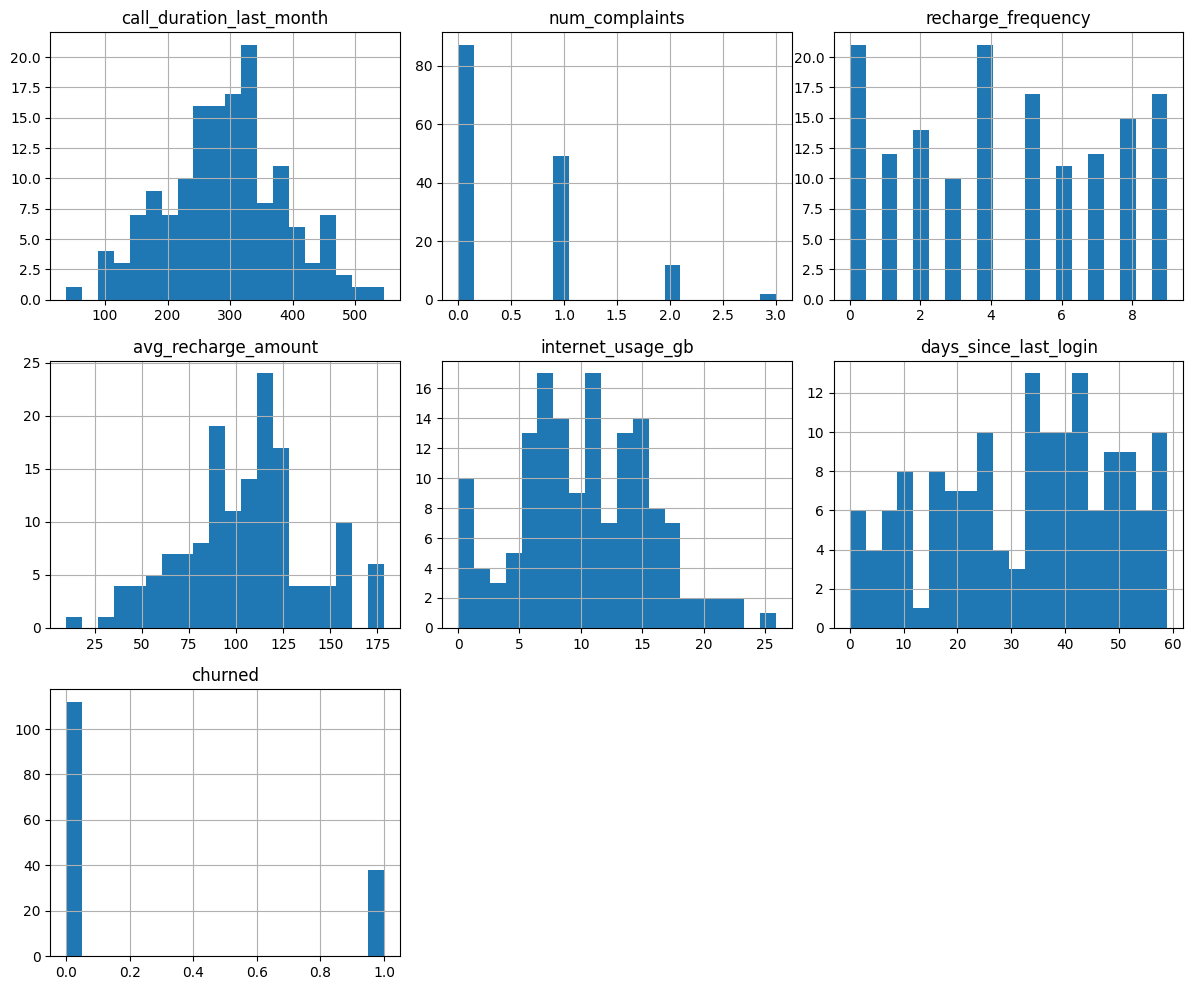

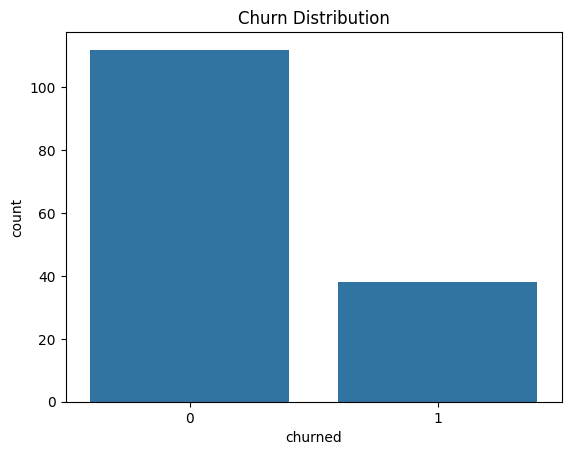

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for numeric features
df.hist(figsize=(12, 10), bins=20)
plt.tight_layout()
plt.show()

# Count of churned vs not churned
sns.countplot(data=df, x='churned')
plt.title("Churn Distribution")
plt.show()

In [6]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/sample_data/Telecom_cust.csv')
df.head()


,customer_id,call_duration_last_month,num_complaints,recharge_frequency,avg_recharge_amount,internet_usage_gb,days_since_last_login,churned
0,CUST0001,349.671415,2,6,10.000000,18.861890,58,0
1,CUST0002,286.173570,0,1,91.952108,8.008133,45,1
2,CUST0003,364.768854,0,8,84.462632,11.250952,22,1
3,CUST0004,452.302986,1,9,126.784761,14.028676,31,0
4,CUST0005,276.584662,0,9,83.102242,0.000000,16,1


Bivariate Analysis

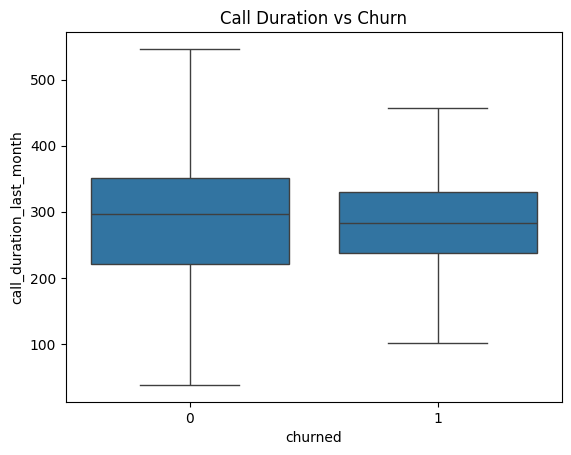

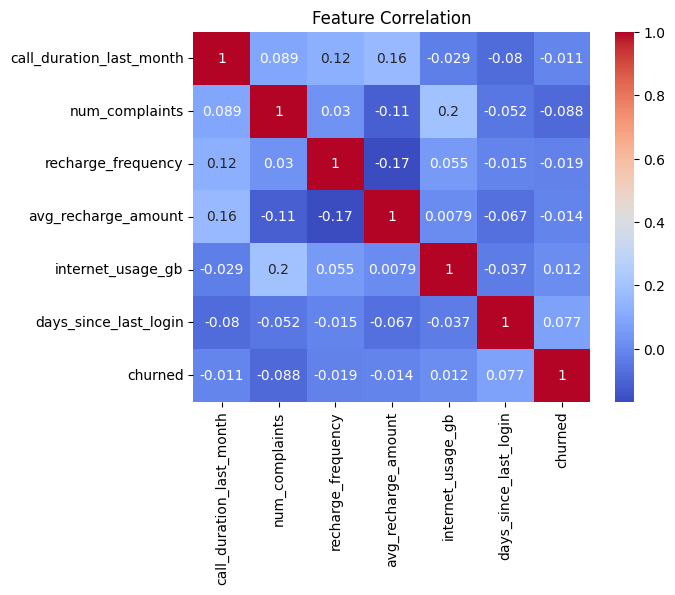

In [9]:
# Boxplot: Call Duration vs Churn
import seaborn as sns # Ensure seaborn is imported in this cell
import matplotlib.pyplot as plt # Ensure matplotlib is imported in this cell as well

# Make sure the cell that defines 'df' (the one with pd.read_csv) has been run before this cell.
sns.boxplot(x='churned', y='call_duration_last_month', data=df)
plt.title("Call Duration vs Churn")
plt.show()

# Drop the 'customer_id' column before calculating correlation as it's non-numeric
sns.heatmap(df.drop('customer_id', axis=1).corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation")
plt.show()

 Feature Engineering

In [18]:
# Total interactions (calls + complaints)
df['interaction_score'] = df['call_duration_last_month'] + df['num_complaints']

# Recharge per usage
df['recharge_per_gb'] = df['avg_recharge_amount'] / (df['internet_usage_gb'] + 1)

# Customer inactivity risk
# Total interactions (calls + complaints)
df['interaction_score'] = df['call_duration_last_month'] + df['num_complaints']

# Recharge per usage
df['recharge_per_gb'] = df['avg_recharge_amount'] / (df['internet_usage_gb'] + 1)

# Customer inactivity risk
df['inactive_days_ratio'] = df['days_since_last_login'] / 30

print(df)

    customer_id  call_duration_last_month  num_complaints  recharge_frequency  \
0      CUST0001                  0.613116               2                   6   
1      CUST0002                  0.488193               0                   1   
2      CUST0003                  0.642818               0                   8   
3      CUST0004                  0.815028               1                   9   
4      CUST0005                  0.469329               0                   9   
..          ...                       ...             ...                 ...   
145    CUST0146                  0.669206               2                   7   
146    CUST0147                  0.272044               0                   1   
147    CUST0148                  0.255615               0                   7   
148    CUST0149                  0.618079               0                   6   
149    CUST0150                  0.573822               0                   9   

     avg_recharge_amount  i

In [19]:
# Convert churned to binary if it's not already
df['churned'] = df['churned'].map({'Yes': 1, 'No': 0})  # Adjust if needed
print(df)

    customer_id  call_duration_last_month  num_complaints  recharge_frequency  \
0      CUST0001                  0.613116               2                   6   
1      CUST0002                  0.488193               0                   1   
2      CUST0003                  0.642818               0                   8   
3      CUST0004                  0.815028               1                   9   
4      CUST0005                  0.469329               0                   9   
..          ...                       ...             ...                 ...   
145    CUST0146                  0.669206               2                   7   
146    CUST0147                  0.272044               0                   1   
147    CUST0148                  0.255615               0                   7   
148    CUST0149                  0.618079               0                   6   
149    CUST0150                  0.573822               0                   9   

     avg_recharge_amount  i

In [20]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_columns = ['call_duration_last_month', 'avg_recharge_amount', 'internet_usage_gb']
df[scaled_columns] = scaler.fit_transform(df[scaled_columns])
print(df)


    customer_id  call_duration_last_month  num_complaints  recharge_frequency  \
0      CUST0001                  0.613116               2                   6   
1      CUST0002                  0.488193               0                   1   
2      CUST0003                  0.642818               0                   8   
3      CUST0004                  0.815028               1                   9   
4      CUST0005                  0.469329               0                   9   
..          ...                       ...             ...                 ...   
145    CUST0146                  0.669206               2                   7   
146    CUST0147                  0.272044               0                   1   
147    CUST0148                  0.255615               0                   7   
148    CUST0149                  0.618079               0                   6   
149    CUST0150                  0.573822               0                   9   

     avg_recharge_amount  i

In [26]:
import pandas as pd

df = pd.read_csv('/content/sample_data/Telecom_cust.csv')  # adjust path if needed
print(df.head())
print(df.info())
print(df['churned'].value_counts(dropna=False))  # shows NaN too

  customer_id  call_duration_last_month  num_complaints  recharge_frequency  \
0    CUST0001                349.671415               2                   6   
1    CUST0002                286.173570               0                   1   
2    CUST0003                364.768854               0                   8   
3    CUST0004                452.302986               1                   9   
4    CUST0005                276.584662               0                   9   

   avg_recharge_amount  internet_usage_gb  days_since_last_login  churned  
0            10.000000          18.861890                     58        0  
1            91.952108           8.008133                     45        1  
2            84.462632          11.250952                     22        1  
3           126.784761          14.028676                     31        0  
4            83.102242           0.000000                     16        1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 1

In [29]:
# Temporary workaround for testing
import numpy as np
df['churned'] = np.random.randint(0, 2, size=len(df))
print(df)

    customer_id  call_duration_last_month  num_complaints  recharge_frequency  \
0      CUST0001                349.671415               2                   6   
1      CUST0002                286.173570               0                   1   
2      CUST0003                364.768854               0                   8   
3      CUST0004                452.302986               1                   9   
4      CUST0005                276.584662               0                   9   
..          ...                       ...             ...                 ...   
145    CUST0146                378.182287               2                   7   
146    CUST0147                176.304929               0                   1   
147    CUST0148                167.954339               0                   7   
148    CUST0149                352.194157               0                   6   
149    CUST0150                329.698467               0                   9   

     avg_recharge_amount  i

In [31]:
print(df.columns)


Index(['customer_id', 'call_duration_last_month', 'num_complaints',
       'recharge_frequency', 'avg_recharge_amount', 'internet_usage_gb',
       'days_since_last_login', 'churned'],
      dtype='object')


In [32]:
df['churned'] = pd.to_numeric(df['churned'], errors='coerce')
print(df)

    customer_id  call_duration_last_month  num_complaints  recharge_frequency  \
0      CUST0001                349.671415               2                   6   
1      CUST0002                286.173570               0                   1   
2      CUST0003                364.768854               0                   8   
3      CUST0004                452.302986               1                   9   
4      CUST0005                276.584662               0                   9   
..          ...                       ...             ...                 ...   
145    CUST0146                378.182287               2                   7   
146    CUST0147                176.304929               0                   1   
147    CUST0148                167.954339               0                   7   
148    CUST0149                352.194157               0                   6   
149    CUST0150                329.698467               0                   9   

     avg_recharge_amount  i

In [34]:
df = df.dropna(subset=['churned'])
print(df)

    customer_id  call_duration_last_month  num_complaints  recharge_frequency  \
0      CUST0001                349.671415               2                   6   
1      CUST0002                286.173570               0                   1   
2      CUST0003                364.768854               0                   8   
3      CUST0004                452.302986               1                   9   
4      CUST0005                276.584662               0                   9   
..          ...                       ...             ...                 ...   
145    CUST0146                378.182287               2                   7   
146    CUST0147                176.304929               0                   1   
147    CUST0148                167.954339               0                   7   
148    CUST0149                352.194157               0                   6   
149    CUST0150                329.698467               0                   9   

     avg_recharge_amount  i

In [36]:
X = df.drop(['churned', 'customer_id'], axis=1)
y = df['churned'].astype(int)
print(df)

    customer_id  call_duration_last_month  num_complaints  recharge_frequency  \
0      CUST0001                349.671415               2                   6   
1      CUST0002                286.173570               0                   1   
2      CUST0003                364.768854               0                   8   
3      CUST0004                452.302986               1                   9   
4      CUST0005                276.584662               0                   9   
..          ...                       ...             ...                 ...   
145    CUST0146                378.182287               2                   7   
146    CUST0147                176.304929               0                   1   
147    CUST0148                167.954339               0                   7   
148    CUST0149                352.194157               0                   6   
149    CUST0150                329.698467               0                   9   

     avg_recharge_amount  i

In [40]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(df)


    customer_id  call_duration_last_month  num_complaints  recharge_frequency  \
0      CUST0001                349.671415               2                   6   
1      CUST0002                286.173570               0                   1   
2      CUST0003                364.768854               0                   8   
3      CUST0004                452.302986               1                   9   
4      CUST0005                276.584662               0                   9   
..          ...                       ...             ...                 ...   
145    CUST0146                378.182287               2                   7   
146    CUST0147                176.304929               0                   1   
147    CUST0148                167.954339               0                   7   
148    CUST0149                352.194157               0                   6   
149    CUST0150                329.698467               0                   9   

     avg_recharge_amount  i

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42)


In [39]:
print(df)

    customer_id  call_duration_last_month  num_complaints  recharge_frequency  \
0      CUST0001                349.671415               2                   6   
1      CUST0002                286.173570               0                   1   
2      CUST0003                364.768854               0                   8   
3      CUST0004                452.302986               1                   9   
4      CUST0005                276.584662               0                   9   
..          ...                       ...             ...                 ...   
145    CUST0146                378.182287               2                   7   
146    CUST0147                176.304929               0                   1   
147    CUST0148                167.954339               0                   7   
148    CUST0149                352.194157               0                   6   
149    CUST0150                329.698467               0                   9   

     avg_recharge_amount  i

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate performance
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[8 7]
 [9 6]]

Classification Report:
               precision    recall  f1-score   support

           0       0.47      0.53      0.50        15
           1       0.46      0.40      0.43        15

    accuracy                           0.47        30
   macro avg       0.47      0.47      0.46        30
weighted avg       0.47      0.47      0.46        30



In [42]:
y.value_counts(normalize=True)

,proportion
churned,
0,0.506667
1,0.493333


In [44]:
model = LogisticRegression(class_weight='balanced')
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced')

In [45]:
from sklearn.metrics import roc_auc_score, confusion_matrix

print("ROC AUC Score:", roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))

ROC AUC Score: 0.4444444444444444


In [46]:
df.head()

,customer_id,call_duration_last_month,num_complaints,recharge_frequency,avg_recharge_amount,internet_usage_gb,days_since_last_login,churned
0,CUST0001,349.671415,2,6,10.000000,18.861890,58,1
1,CUST0002,286.173570,0,1,91.952108,8.008133,45,0
2,CUST0003,364.768854,0,8,84.462632,11.250952,22,0
3,CUST0004,452.302986,1,9,126.784761,14.028676,31,0
4,CUST0005,276.584662,0,9,83.102242,0.000000,16,1


In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Initialize Random Forest with class_weight='balanced' to handle imbalance
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]  # For ROC AUC

# Evaluate
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba_rf))

Confusion Matrix:
 [[10  5]
 [12  3]]

Classification Report:
               precision    recall  f1-score   support

           0       0.45      0.67      0.54        15
           1       0.38      0.20      0.26        15

    accuracy                           0.43        30
   macro avg       0.41      0.43      0.40        30
weighted avg       0.41      0.43      0.40        30

ROC AUC Score: 0.4488888888888889


/tmp/ipython-input-48-2366171790.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feat_imp_df, x='Importance', y='Feature', palette='viridis')


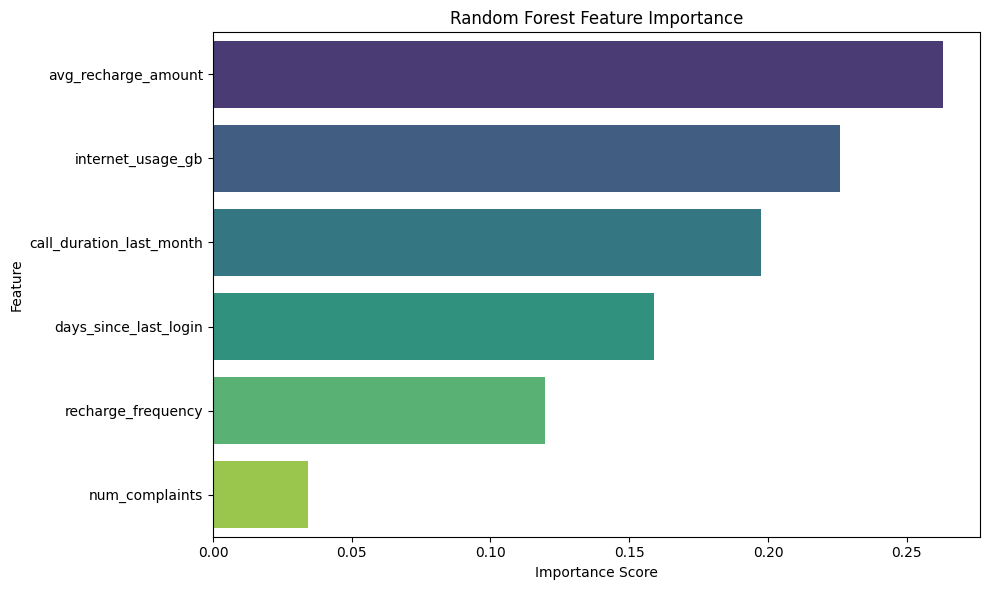

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances
importances = rf_model.feature_importances_
feature_names = X.columns

# Create a DataFrame for plotting
feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=feat_imp_df, x='Importance', y='Feature', palette='viridis')
plt.title('Random Forest Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Load the dataset
df = pd.read_csv("/content/sample_data/Telecom_cust (1).csv")

# Drop customer_id and separate features/target
df_model = df.drop(columns=['customer_id'])
X = df_model.drop(columns=['churned'])
y = df_model['churned']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Train Random Forest model
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced', n_estimators=100)
rf_model.fit(X_train, y_train)

# Evaluate model
y_pred_rf = rf_model.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

Confusion Matrix:
 [[21  1]
 [ 8  0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.95      0.82        22
           1       0.00      0.00      0.00         8

    accuracy                           0.70        30
   macro avg       0.36      0.48      0.41        30
weighted avg       0.53      0.70      0.60        30



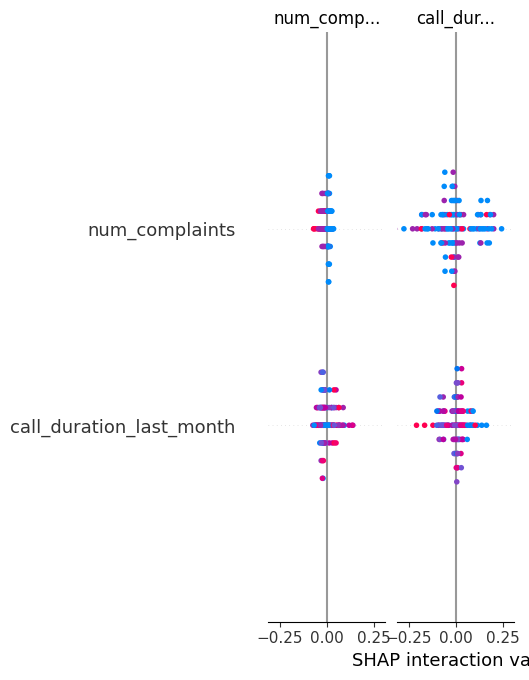

In [4]:
import shap

# New SHAP API works directly with your DataFrame
explainer = shap.Explainer(rf_model, X_train)
shap_values = explainer(X_train)

# SHAP summary plot — this will work correctly
shap.summary_plot(shap_values, X_train)

In [5]:
# Predict churn probabilities on the full dataset
df_model['churn_probability'] = rf_model.predict_proba(X)[:, 1]

# Example segmentation logic (adjust thresholds as needed)
def segment_customer(row):
    if row['churn_probability'] > 0.6:
        return 'At Risk'
    elif row['churn_probability'] < 0.3 and row.get('tenure', 0) > 365:
        return 'Loyal'
    elif row.get('recharge_count', 0) < 2:
        return 'Dormant'
    else:
        return 'Others'

# Apply segmentation
df_model['segment'] = df_model.apply(segment_customer, axis=1)

In [7]:
# Quick summary of segments
segment_summary = df_model.groupby('segment').agg({
    'churn_probability': ['mean', 'count'],
    'recharge_frequency': 'mean' if 'recharge_frequency' in df_model.columns else 'count',
    'num_complaints': 'mean' if 'num_complaints' in df_model.columns else 'count'
}).reset_index()

segment_summary.columns = ['Segment', 'Avg Churn Prob', 'Customer Count', 'Avg Recharge Count', 'Avg Complaint Count']
print(segment_summary)

   Segment  Avg Churn Prob  Customer Count  Avg Recharge Count  \
0  At Risk        0.742143              28            3.321429   
1  Dormant        0.125656             122            4.663934   

   Avg Complaint Count  
0             0.428571  
1             0.549180  


In [8]:
churn_rate = df_model.groupby('segment')['churned'].mean().reset_index()
churn_rate.columns = ['Segment', 'Churn Rate']
print(churn_rate)

   Segment  Churn Rate
0  At Risk    1.000000
1  Dormant    0.081967


In [9]:
correlation_matrix = df_model[['churn_probability', 'recharge_frequency', 'num_complaints', 'avg_recharge_amount', 'internet_usage_gb', 'days_since_last_login']].corr()
print(correlation_matrix)

                       churn_probability  recharge_frequency  num_complaints  \
churn_probability               1.000000           -0.203984       -0.090180   
recharge_frequency             -0.203984            1.000000        0.030048   
num_complaints                 -0.090180            0.030048        1.000000   
avg_recharge_amount            -0.074689           -0.166695       -0.113189   
internet_usage_gb              -0.053375            0.054657        0.195848   
days_since_last_login           0.127665           -0.014874       -0.052187   

                       avg_recharge_amount  internet_usage_gb  \
churn_probability                -0.074689          -0.053375   
recharge_frequency               -0.166695           0.054657   
num_complaints                   -0.113189           0.195848   
avg_recharge_amount               1.000000           0.007888   
internet_usage_gb                 0.007888           1.000000   
days_since_last_login            -0.066838       

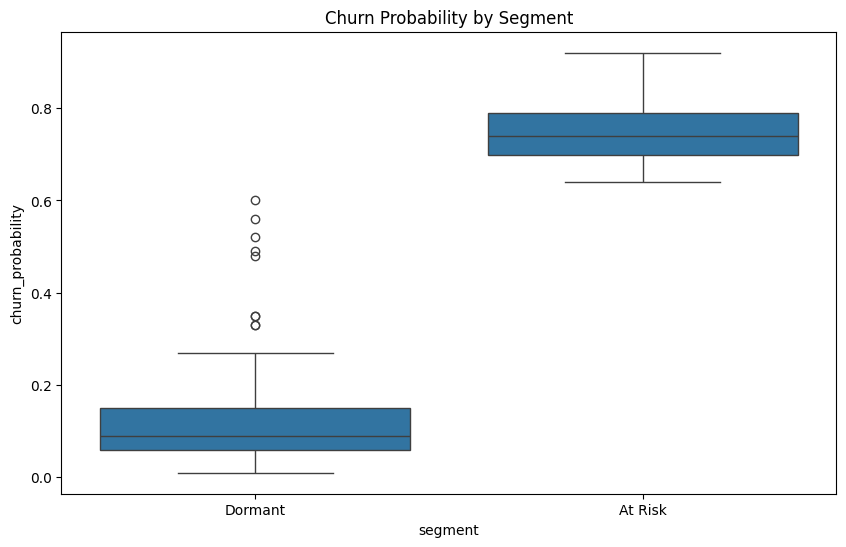

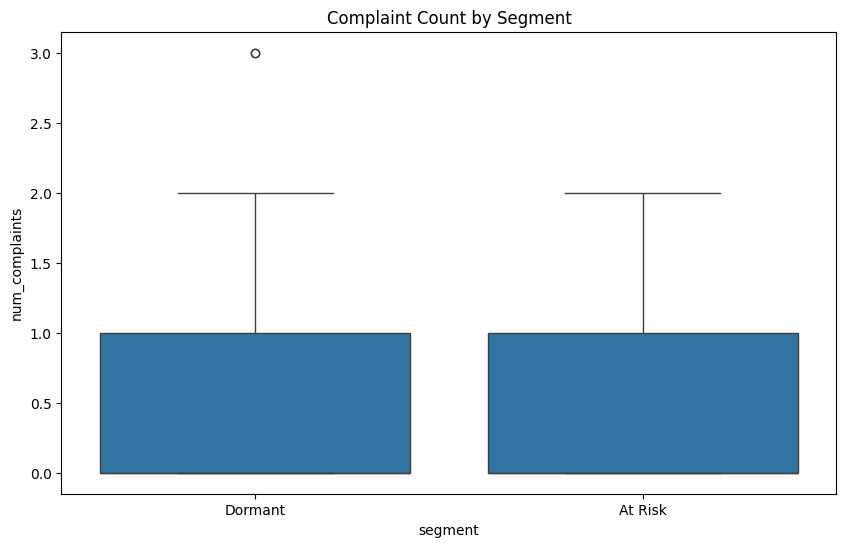

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Churn probability vs Recharge Frequency
plt.figure(figsize=(10, 6))
sns.boxplot(x='segment', y='churn_probability', data=df_model)
plt.title('Churn Probability by Segment')
plt.show()

# Churn probability vs Complaints
plt.figure(figsize=(10, 6))
sns.boxplot(x='segment', y='num_complaints', data=df_model)
plt.title('Complaint Count by Segment')
plt.show()

In [11]:
segment_profile = df_model.groupby('segment').agg({
    'recharge_frequency': ['mean', 'median', 'std'],
    'num_complaints': ['mean', 'median', 'std'],
    'avg_recharge_amount': ['mean', 'median', 'std'],
    'internet_usage_gb': ['mean', 'median', 'std'],
    'days_since_last_login': ['mean', 'median', 'std'],
}).reset_index()

print(segment_profile)

   segment recharge_frequency                  num_complaints         \
                         mean median       std           mean median   
0  At Risk           3.321429    2.5  3.399930       0.428571    0.0   
1  Dormant           4.663934    5.0  2.824365       0.549180    0.0   

            avg_recharge_amount                        internet_usage_gb  \
        std                mean      median        std              mean   
0  0.634126           97.960214   94.248114  36.818731         10.107709   
1  0.717001          107.106838  108.172915  32.476803         10.327806   

                       days_since_last_login                    
      median       std                  mean median        std  
0  10.806272  5.160564             38.535714   41.0  15.098399  
1  10.186423  5.512083             31.237705   34.0  16.643095  


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Prepare data
features = df_model[['recharge_frequency', 'num_complaints', 'avg_recharge_amount', 'internet_usage_gb', 'days_since_last_login']]
target = df_model['churned']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Model training
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Model evaluation
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.88      0.79        32
           1       0.33      0.15      0.21        13

    accuracy                           0.67        45
   macro avg       0.53      0.51      0.50        45
weighted avg       0.61      0.67      0.62        45



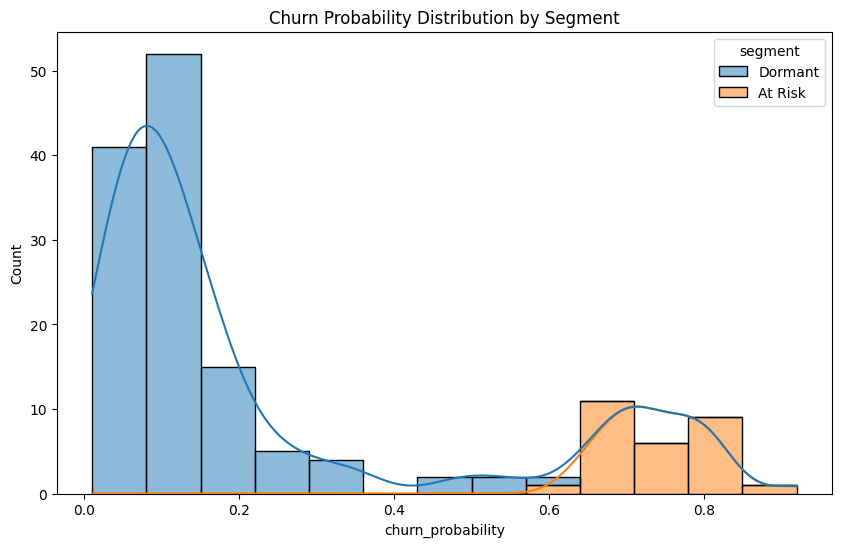

In [13]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df_model, x='churn_probability', hue='segment', multiple="stack", kde=True)
plt.title('Churn Probability Distribution by Segment')
plt.show()

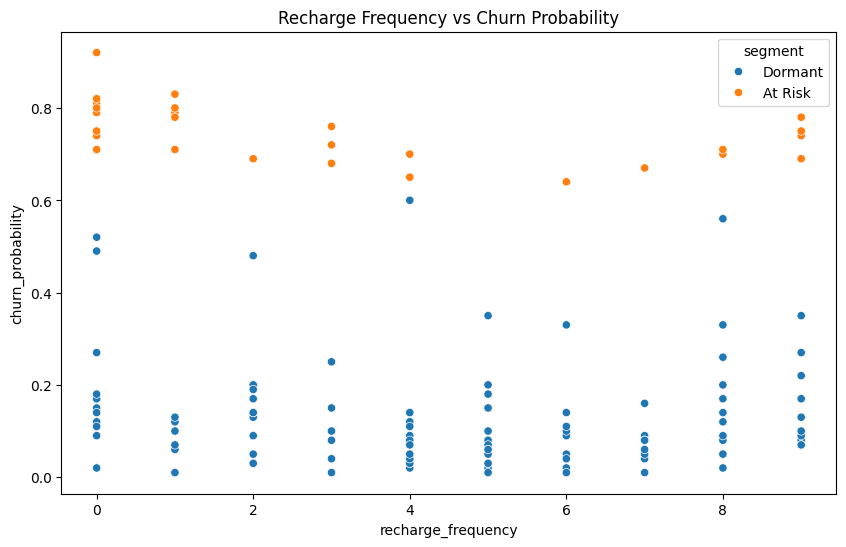

In [14]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_model, x='recharge_frequency', y='churn_probability', hue='segment')
plt.title('Recharge Frequency vs Churn Probability')
plt.show()

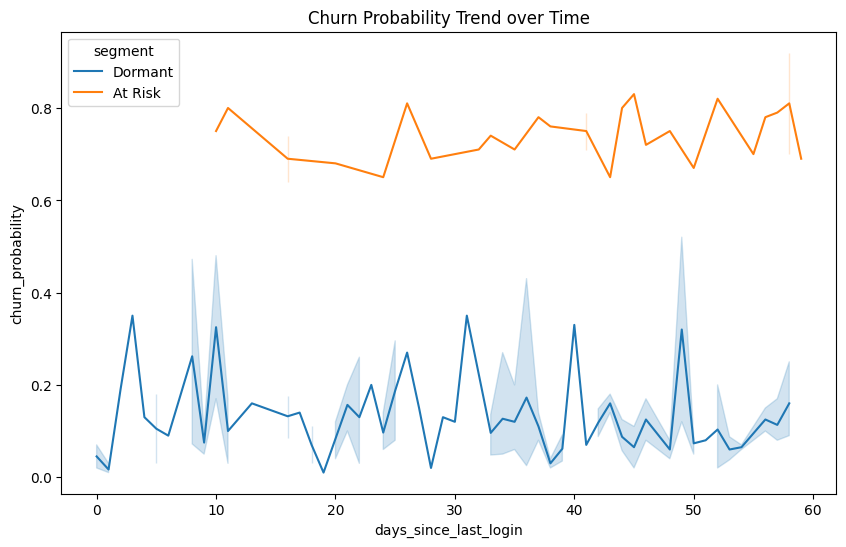

In [15]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_model, x='days_since_last_login', y='churn_probability', hue='segment')
plt.title('Churn Probability Trend over Time')
plt.show()

In [16]:
!pip install xgboost

In [17]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Prepare the data for training
features = df_model[['recharge_frequency', 'num_complaints', 'avg_recharge_amount', 'internet_usage_gb', 'days_since_last_login']]
target = df_model['churned']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Train the XGBoost model
model = XGBClassifier(random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.6


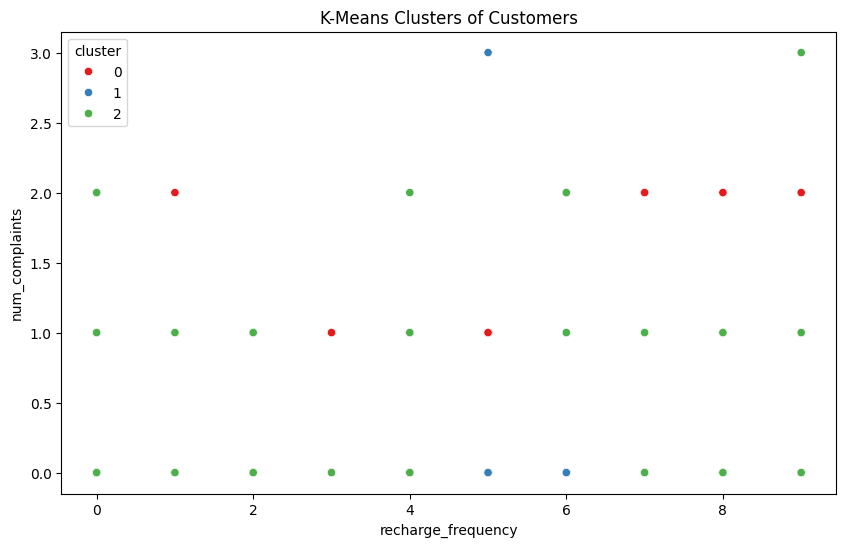

In [18]:
from sklearn.cluster import KMeans

# Prepare the features
features = df_model[['recharge_frequency', 'num_complaints', 'avg_recharge_amount', 'internet_usage_gb', 'days_since_last_login']]

# K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df_model['cluster'] = kmeans.fit_predict(features)

# Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_model, x='recharge_frequency', y='num_complaints', hue='cluster', palette='Set1')
plt.title('K-Means Clusters of Customers')
plt.show()

In [21]:
def segment_customer(row):
    if row['churned'] == 1 and row['num_complaints'] > 0:
        return "At Risk"
    elif row['churned'] == 0 and row['recharge_frequency'] >= 6:
        return "Loyal"
    elif row['days_since_last_login'] > 50:
        return "Dormant"
    else:
        return "General"

df['segment'] = df.apply(segment_customer, axis=1)


In [22]:
df['segment'].value_counts()

,count
segment,
General,83
Loyal,39
Dormant,15
At Risk,13


In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv("/content/sample_data/Telecom_cust (1).csv")  # Adjust path for local if needed
df.dropna(inplace=True)  # Drop missing values

df.head()


,customer_id,call_duration_last_month,num_complaints,recharge_frequency,avg_recharge_amount,internet_usage_gb,days_since_last_login,churned
0,CUST0001,349.671415,2,6,10.000000,18.861890,58,0
1,CUST0002,286.173570,0,1,91.952108,8.008133,45,1
2,CUST0003,364.768854,0,8,84.462632,11.250952,22,1
3,CUST0004,452.302986,1,9,126.784761,14.028676,31,0
4,CUST0005,276.584662,0,9,83.102242,0.000000,16,1


In [24]:
# Define target variable and feature columns
target = 'avg_recharge_amount'
X = df.drop(columns=[target, 'customer_id'])  # Drop ID and target
y = df[target]

# Convert categorical columns if any
X = pd.get_dummies(X, drop_first=True)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [25]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

print("Ridge R2 Score:", r2_score(y_test, y_pred_ridge))
print("Ridge MSE:", mean_squared_error(y_test, y_pred_ridge))


Ridge R2 Score: -0.04142494960977805
Ridge MSE: 1084.9329610678474


In [26]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

print("Lasso R2 Score:", r2_score(y_test, y_pred_lasso))
print("Lasso MSE:", mean_squared_error(y_test, y_pred_lasso))


Lasso R2 Score: -0.041075928160163366
Lasso MSE: 1084.5693584146281


In [27]:
elastic = ElasticNet(alpha=0.1, l1_ratio=0.5)  # l1_ratio=0.5 means equal Ridge + Lasso
elastic.fit(X_train, y_train)
y_pred_elastic = elastic.predict(X_test)

print("ElasticNet R2 Score:", r2_score(y_test, y_pred_elastic))
print("ElasticNet MSE:", mean_squared_error(y_test, y_pred_elastic))


ElasticNet R2 Score: -0.034152058475829694
ElasticNet MSE: 1077.356227558212


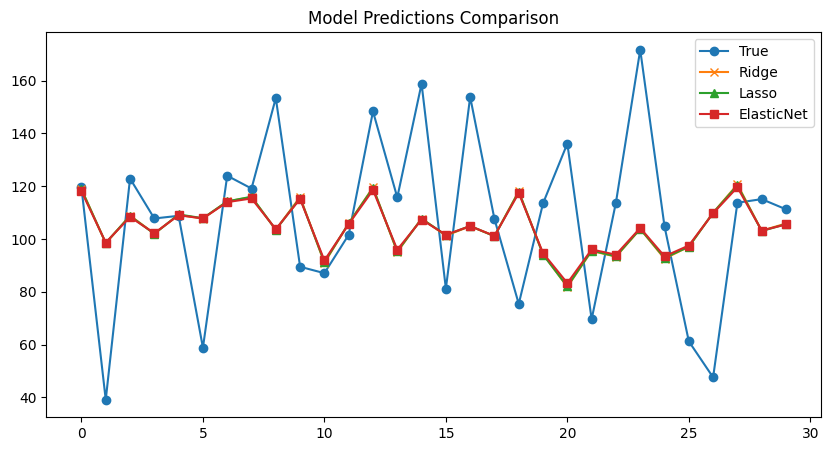

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label="True", marker='o')
plt.plot(y_pred_ridge, label="Ridge", marker='x')
plt.plot(y_pred_lasso, label="Lasso", marker='^')
plt.plot(y_pred_elastic, label="ElasticNet", marker='s')
plt.legend()
plt.title("Model Predictions Comparison")
plt.show()


In [29]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [31]:
df = pd.read_csv('/content/sample_data/Telecom_cust (1).csv')
df.dropna(inplace=True)

# Optional: Drop identifier or target
X = df.drop(columns=['customer_id', 'churned'])  # keep only numeric features

# Encode categorical features if any
X = pd.get_dummies(X, drop_first=True)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


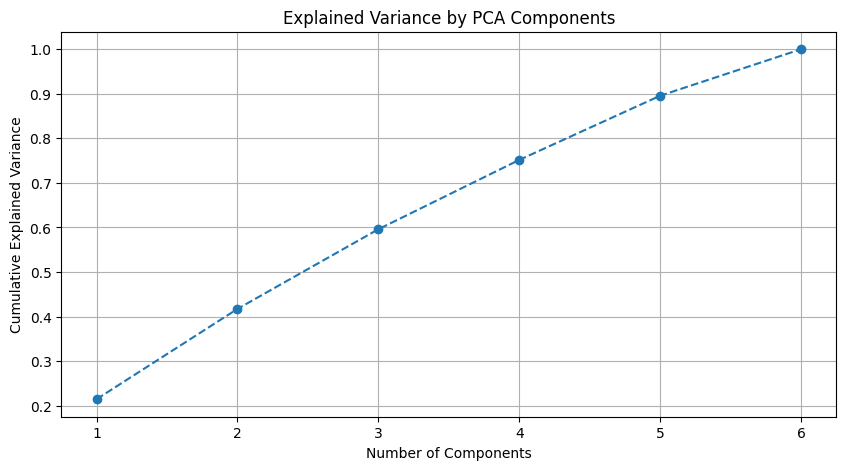

In [33]:
# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Check explained variance
explained_var = pca.explained_variance_ratio_

# Plot explained variance
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(explained_var)+1), explained_var.cumsum(), marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.grid()
plt.show()


In [34]:
# Let's reduce to 2 components
pca_2 = PCA(n_components=2)
X_pca_2 = pca_2.fit_transform(X_scaled)

# Convert to DataFrame
df_pca = pd.DataFrame(X_pca_2, columns=['PC1', 'PC2'])
df_pca['churned'] = df['churned'].values


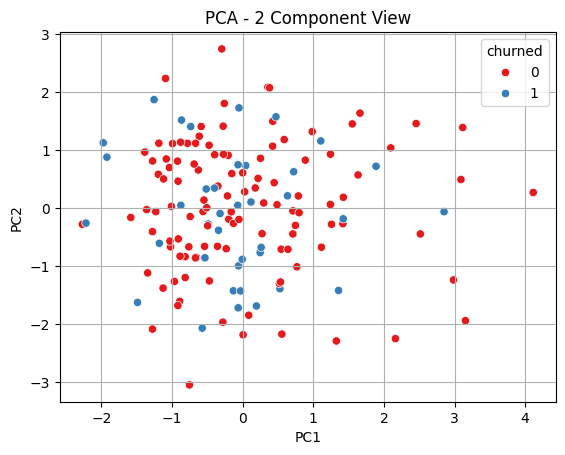

In [35]:
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='churned', palette='Set1')
plt.title('PCA - 2 Component View')
plt.grid(True)
plt.show()


In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X_pca_2, df['churned'], test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy on PCA-transformed data:", accuracy_score(y_test, y_pred))


Accuracy on PCA-transformed data: 0.7333333333333333


In [37]:
from sklearn.decomposition import PCA

# Reduce to 3 principal components
pca_3 = PCA(n_components=3)
X_pca_3 = pca_3.fit_transform(X_scaled)

# Create DataFrame for plotting
df_pca_3 = pd.DataFrame(X_pca_3, columns=['PC1', 'PC2', 'PC3'])
df_pca_3['churned'] = df['churned'].values


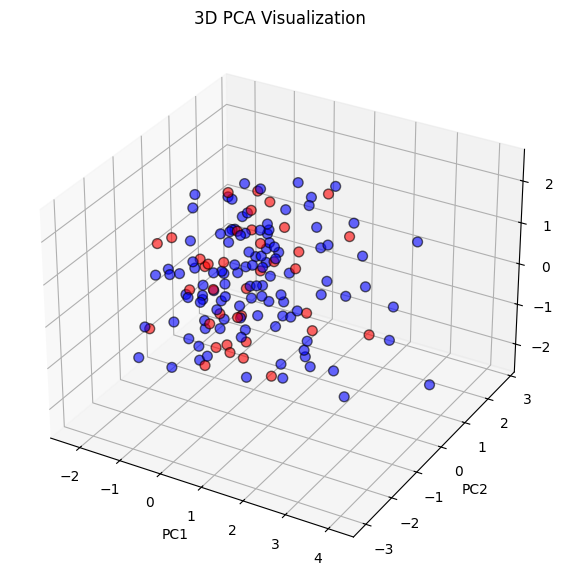

In [38]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Setup 3D plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Color mapping: 0 = not churned, 1 = churned
colors = df_pca_3['churned'].map({0: 'blue', 1: 'red'})

# Scatter plot
ax.scatter(df_pca_3['PC1'], df_pca_3['PC2'], df_pca_3['PC3'],
           c=colors, alpha=0.6, edgecolor='k', s=50)

# Labels
ax.set_title('3D PCA Visualization')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

plt.show()
